# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



### Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?

* This data represents 17 marketing campaigns

### Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder, LabelEncoder, PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression, RidgeClassifier, Lasso
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
import time
import seaborn as sns
plt.style.use('ggplot')

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('data/bank-additional-full.csv', sep = ';')

In [3]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

* *Data does not contain any nulls. However, there may be values which are not applicable and almost like nulls. Need to identify and process those accordingly*

**EDA**

In [5]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


*Check duplicates*

In [6]:
df.duplicated().sum()

12

In [7]:
#Drop the duplicate rows
df.drop_duplicates(inplace=True)

* *Quick look at the histograms to see the distribution for all the numeric variables*

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'duration'}>,
        <Axes: title={'center': 'campaign'}>],
       [<Axes: title={'center': 'pdays'}>,
        <Axes: title={'center': 'previous'}>,
        <Axes: title={'center': 'emp.var.rate'}>],
       [<Axes: title={'center': 'cons.price.idx'}>,
        <Axes: title={'center': 'cons.conf.idx'}>,
        <Axes: title={'center': 'euribor3m'}>],
       [<Axes: title={'center': 'nr.employed'}>, <Axes: >, <Axes: >]],
      dtype=object)

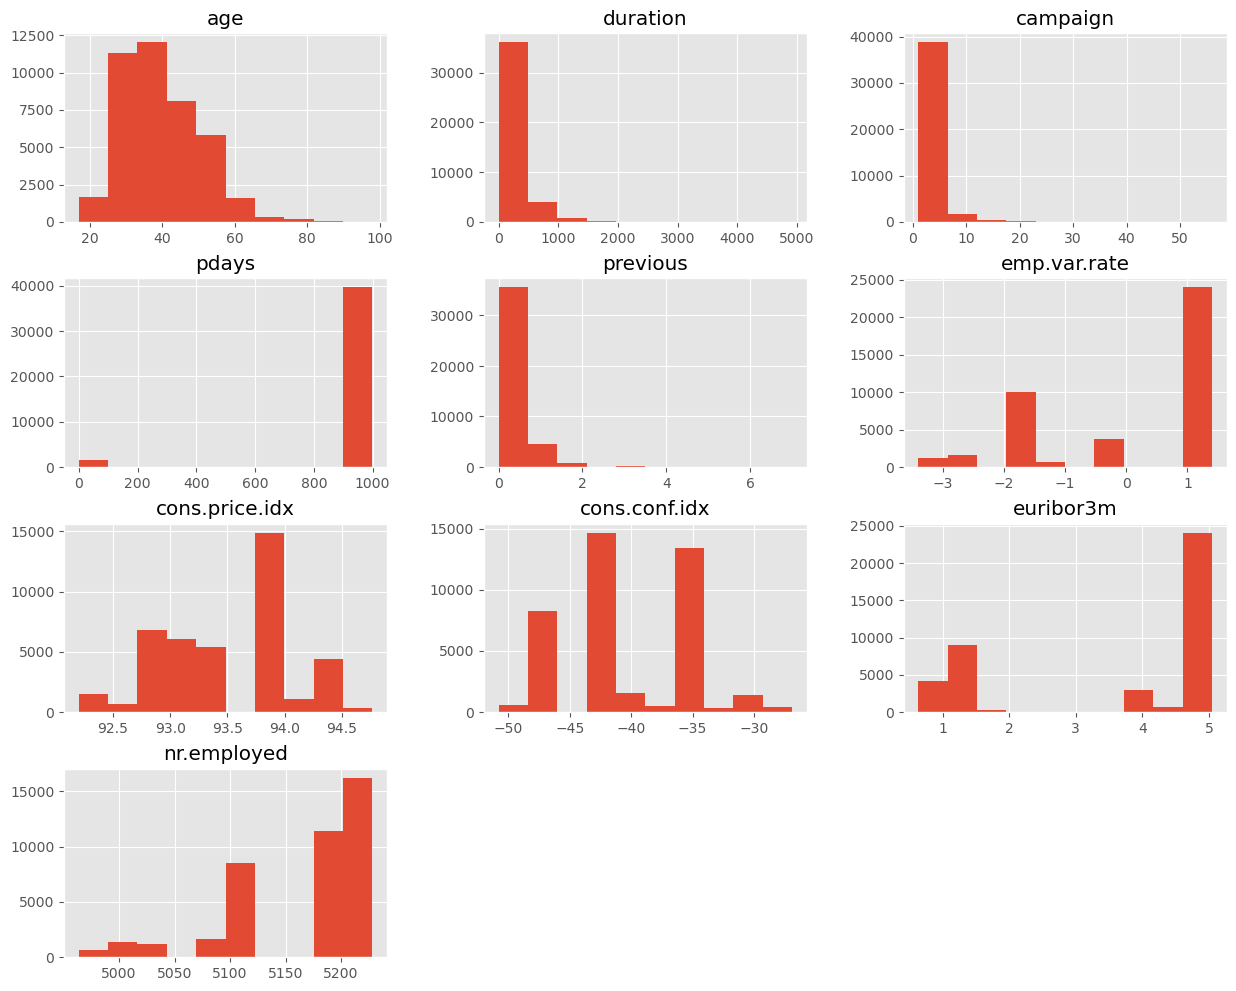

In [8]:
df.hist(figsize=[15, 12])

* *There are some outliers and non-normal distribution that needs to be looked into in many of the columns*

**Closer look at the target column**

In [9]:
df.y.value_counts()

y
no     36537
yes     4639
Name: count, dtype: int64

In [10]:
df.y.value_counts(normalize=True)

y
no     0.887337
yes    0.112663
Name: proportion, dtype: float64

* *Target column shows imbalanced data. About 11% conversion rate*

***Convert target column to numeric***

In [11]:
df['y'] = df['y'].map({'yes': 1, 'no': 0})
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1


**Let's take a closer look at the data in each of the features**

In [12]:
num_rows = len(df)
num_rows

41176

In [13]:
df[df.age > 65]['age'].count()/num_rows

0.015008742957062367

<Axes: >

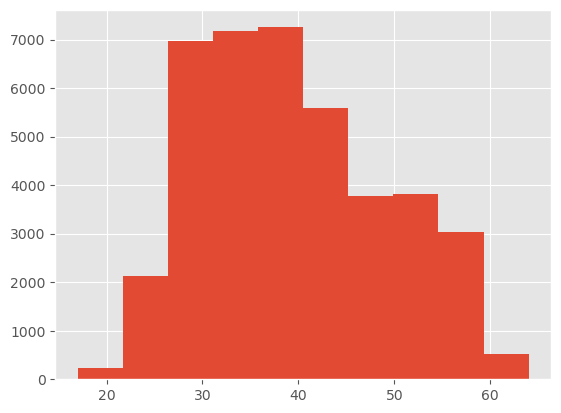

In [14]:
df[df.age < 65]['age'].hist()

* *Drop rows with **age** > 65 to remove the outliers reducing the right skew? Leave them in to start with - max age 98 is not unreasonable*

In [15]:
# Check number of unique values in each column
df.apply(pd.Series.nunique)

age                 78
job                 12
marital              4
education            8
default              3
housing              3
loan                 3
contact              2
month               10
day_of_week          5
duration          1544
campaign            42
pdays               27
previous             8
poutcome             3
emp.var.rate        10
cons.price.idx      26
cons.conf.idx       26
euribor3m          316
nr.employed         11
y                    2
dtype: int64

In [16]:
df.job.value_counts()

job
admin.           10419
blue-collar       9253
technician        6739
services          3967
management        2924
retired           1718
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: count, dtype: int64

* *Drop rows with '**unknown**' value in '**job**' column* - small proportion of the data and best not to impute
* *Use Ordinal encoding for '**job**' column*

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'housemaid'),
  Text(1, 0, 'services'),
  Text(2, 0, 'admin.'),
  Text(3, 0, 'blue-collar'),
  Text(4, 0, 'technician'),
  Text(5, 0, 'retired'),
  Text(6, 0, 'management'),
  Text(7, 0, 'unemployed'),
  Text(8, 0, 'self-employed'),
  Text(9, 0, 'unknown'),
  Text(10, 0, 'entrepreneur'),
  Text(11, 0, 'student')])

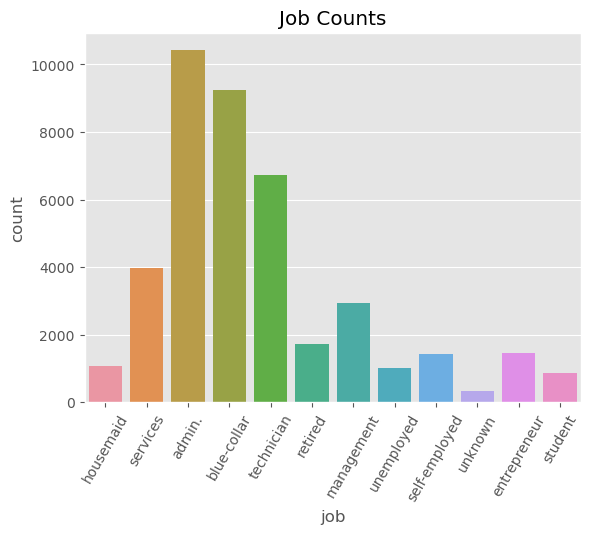

In [17]:
# Plot counts by job
sns.countplot(df, x='job').set_title('Job Counts')
plt.xlabel('job')
plt.ylabel('count')
plt.xticks(rotation=60)

In [18]:
df.groupby(['job'])['y'].value_counts(normalize=True)

job            y
admin.         0    0.870333
               1    0.129667
blue-collar    0    0.931049
               1    0.068951
entrepreneur   0    0.914835
               1    0.085165
housemaid      0    0.900000
               1    0.100000
management     0    0.887825
               1    0.112175
retired        0    0.747381
               1    0.252619
self-employed  0    0.895144
               1    0.104856
services       0    0.918578
               1    0.081422
student        0    0.685714
               1    0.314286
technician     0    0.891675
               1    0.108325
unemployed     0    0.857988
               1    0.142012
unknown        0    0.887879
               1    0.112121
Name: proportion, dtype: float64

* *Almost half of the clients work in admin or blue collar jobs, the admin job holders tend to have almost double acceptance rate (13%) than the blue collar ones (6.9%)*
* *Among the job groups, students (31%) and retired (25%) have the highest subscription rates*

In [20]:
df.marital.value_counts()

marital
married     24921
single      11564
divorced     4611
unknown        80
Name: count, dtype: int64

In [21]:
df.groupby(['marital'])['y'].value_counts(normalize=True)

marital   y
divorced  0    0.896769
          1    0.103231
married   0    0.898439
          1    0.101561
single    0    0.859910
          1    0.140090
unknown   0    0.850000
          1    0.150000
Name: proportion, dtype: float64

* *Singles tend to have higher subscription rates (14%)*


* *Drop rows with '**unknown**' value in '**marital**' column* -- very small proportion of the data
* *Use Label encoding for '**marital**' column*

In [22]:
df.education.value_counts()

education
university.degree      12164
high.school             9512
basic.9y                6045
professional.course     5240
basic.4y                4176
basic.6y                2291
unknown                 1730
illiterate                18
Name: count, dtype: int64

In [23]:
df.groupby(['education'])['y'].value_counts(normalize=True)

education            y
basic.4y             0    0.897510
                     1    0.102490
basic.6y             0    0.917940
                     1    0.082060
basic.9y             0    0.921754
                     1    0.078246
high.school          0    0.891611
                     1    0.108389
illiterate           0    0.777778
                     1    0.222222
professional.course  0    0.886450
                     1    0.113550
university.degree    0    0.862792
                     1    0.137208
unknown              0    0.854913
                     1    0.145087
Name: proportion, dtype: float64

* *University degree holders have among the highest subscription rates (13.7%)*

* *Drop rows with '**unknown**' value in '**education**' column* -- small proportion of the data, best not to impute
* *Use Ordinal encoding for '**education**' column*

In [24]:
df.default.value_counts()

default
no         32577
unknown     8596
yes            3
Name: count, dtype: int64

* *May be best to ignore 'default' column since only 3 of 41k have defaulted. Does not add value to the modeling*
* *Drop '**default**' column*

In [25]:
df.housing.value_counts()

housing
yes        21571
no         18615
unknown      990
Name: count, dtype: int64

(array([0, 1, 2]),
 [Text(0, 0, 'no'), Text(1, 0, 'yes'), Text(2, 0, 'unknown')])

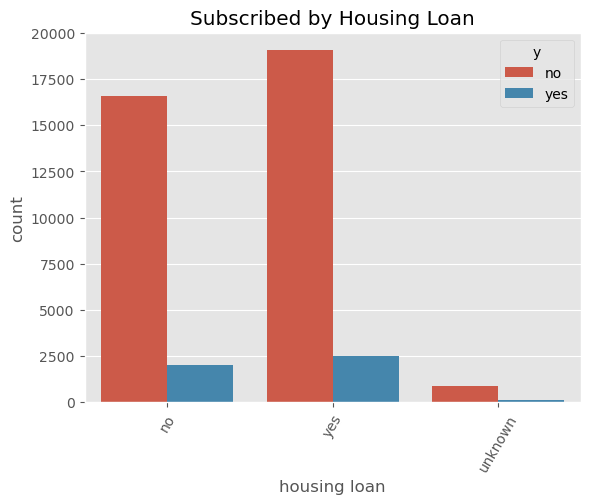

In [26]:
# Plot counts by housing with hue of y
sns.countplot(df, x='housing', hue=df["y"].map({0: "no", 1: "yes"})).set_title('Subscribed by Housing Loan')
plt.xlabel('housing loan')
plt.ylabel('count')
plt.xticks(rotation=60)

In [27]:
df.groupby(['housing', 'y'])['y'].value_counts()

housing  y
no       0    16590
         1     2025
unknown  0      883
         1      107
yes      0    19064
         1     2507
Name: count, dtype: int64

In [28]:
df.groupby(['housing'])['y'].value_counts(normalize=True)

housing  y
no       0    0.891217
         1    0.108783
unknown  0    0.891919
         1    0.108081
yes      0    0.883779
         1    0.116221
Name: proportion, dtype: float64

* *Consider dropping **housing** column since the subscribed proportion seems very similar - i.e., doesn't seem to have any relevant impact on subscription*
  * *Drop column '**housing**'*

In [29]:
df.loan.value_counts()

loan
no         33938
yes         6248
unknown      990
Name: count, dtype: int64

(array([0, 1, 2]),
 [Text(0, 0, 'no'), Text(1, 0, 'yes'), Text(2, 0, 'unknown')])

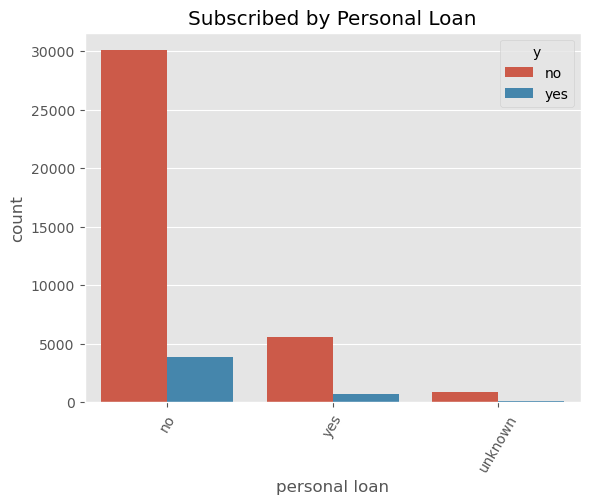

In [30]:
# Plot counts by personal loan with hue of y
sns.countplot(df, x='loan', hue=df["y"].map({0: "no", 1: "yes"})).set_title('Subscribed by Personal Loan')
plt.xlabel('personal loan')
plt.ylabel('count')
plt.xticks(rotation=60)

In [31]:
df.groupby(['loan', 'y'])['y'].value_counts()

loan     y
no       0    30089
         1     3849
unknown  0      883
         1      107
yes      0     5565
         1      683
Name: count, dtype: int64

In [32]:
df.groupby(['loan'])['y'].value_counts(normalize=True)

loan     y
no       0    0.886587
         1    0.113413
unknown  0    0.891919
         1    0.108081
yes      0    0.890685
         1    0.109315
Name: proportion, dtype: float64

* *Consider dropping **loan** column since the subscribed proportion seems very similar - i.e., doesn't seem to have any relevant impact on subscription*
  * *Drop column '**loan**'*

In [33]:
df.contact.value_counts()

contact
cellular     26135
telephone    15041
Name: count, dtype: int64

In [34]:
df.groupby(['contact'])['y'].value_counts(normalize=True)

contact    y
cellular   0    0.852611
           1    0.147389
telephone  0    0.947676
           1    0.052324
Name: proportion, dtype: float64

* *Cellular contact seems to have produced higher acceptance rate (15%) than telephone (5%)* - may be worth exploring this further from business pov to understand the reasoning behind this finding

* *Use Label encoding for '**contact**' column*

In [35]:
df.groupby(['month'])['y'].value_counts()

month  y
apr    0     2092
       1      539
aug    0     5521
       1      655
dec    0       93
       1       89
jul    0     6521
       1      648
jun    0     4759
       1      559
mar    1      276
       0      270
may    0    12881
       1      886
nov    0     3684
       1      416
oct    0      402
       1      315
sep    0      314
       1      256
Name: count, dtype: int64

In [37]:
df.groupby(['month'])['y'].value_counts(normalize=True)

month  y
apr    0    0.795135
       1    0.204865
aug    0    0.893944
       1    0.106056
dec    0    0.510989
       1    0.489011
jul    0    0.909611
       1    0.090389
jun    0    0.894885
       1    0.105115
mar    1    0.505495
       0    0.494505
may    0    0.935643
       1    0.064357
nov    0    0.898537
       1    0.101463
oct    0    0.560669
       1    0.439331
sep    0    0.550877
       1    0.449123
Name: proportion, dtype: float64

In [38]:
df.month.value_counts(normalize=True)

month
may    0.334345
jul    0.174106
aug    0.149990
jun    0.129153
nov    0.099573
apr    0.063896
oct    0.017413
sep    0.013843
mar    0.013260
dec    0.004420
Name: proportion, dtype: float64

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'may'),
  Text(1, 0, 'jun'),
  Text(2, 0, 'jul'),
  Text(3, 0, 'aug'),
  Text(4, 0, 'oct'),
  Text(5, 0, 'nov'),
  Text(6, 0, 'dec'),
  Text(7, 0, 'mar'),
  Text(8, 0, 'apr'),
  Text(9, 0, 'sep')])

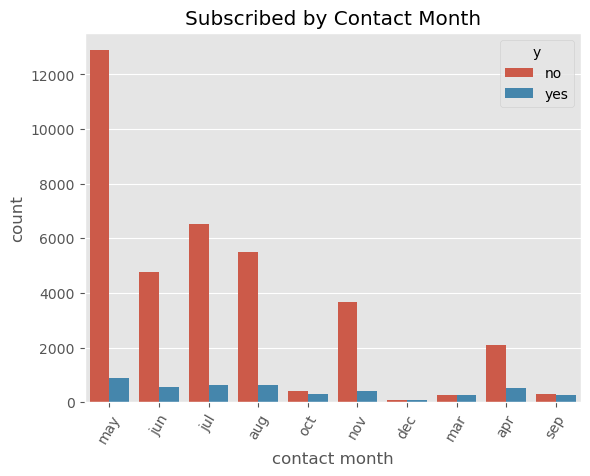

In [39]:
# Plot counts by personal month with hue of y
sns.countplot(df, x='month', hue=df["y"].map({0: "no", 1: "yes"})).set_title('Subscribed by Contact Month')
plt.xlabel('contact month')
plt.ylabel('count')
plt.xticks(rotation=60)

* *Proportion of subscribed is higher in the months of Mar, Sep, Oct, Dec - which suggests perhaps increasing the contacts in those months could be beneficial*
* *However, the data (number of contacts) in those months is also signficantly lower. So, not conclusive, but perhaps enough to give it a test in future campaigns*
* *Use Ordinal encoding for '**month**' column*

In [40]:
df.day_of_week.value_counts()

day_of_week
thu    8618
mon    8512
wed    8134
tue    8086
fri    7826
Name: count, dtype: int64

* *A pretty even distribution of contacts across day of week*

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'mon'),
  Text(1, 0, 'tue'),
  Text(2, 0, 'wed'),
  Text(3, 0, 'thu'),
  Text(4, 0, 'fri')])

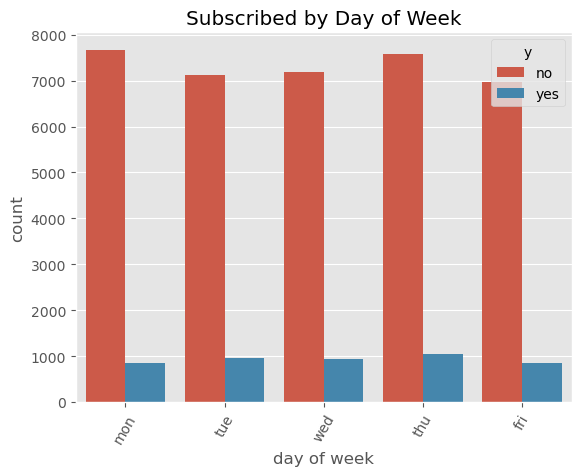

In [41]:
# Plot counts by personal month with hue of y
sns.countplot(df, x='day_of_week', hue=df["y"].map({0: "no", 1: "yes"})).set_title('Subscribed by Day of Week')
plt.xlabel('day of week')
plt.ylabel('count')
plt.xticks(rotation=60)

In [42]:
df.groupby(['day_of_week'])['y'].value_counts(normalize=True)

day_of_week  y
fri          0    0.891899
             1    0.108101
mon          0    0.900493
             1    0.099507
thu          0    0.878858
             1    0.121142
tue          0    0.882142
             1    0.117858
wed          0    0.883329
             1    0.116671
Name: proportion, dtype: float64

* *Contact **day of week** does not seem to be making a relevant difference in subscription*
  * *Drop column '**day of week**'*

* *Contact **duration**, as outlined in the description, is only known after the call, hence it should not be used for predictive purposes*
  * *Drop column '**duration**'*

In [43]:
df.campaign.value_counts()

campaign
1     17634
2     10568
3      5340
4      2650
5      1599
6       979
7       629
8       400
9       283
10      225
11      177
12      125
13       92
14       69
17       58
16       51
15       51
18       33
20       30
19       26
21       24
22       17
23       16
24       15
27       11
29       10
28        8
26        8
25        8
31        7
30        7
35        5
32        4
33        4
34        3
42        2
40        2
43        2
56        1
39        1
41        1
37        1
Name: count, dtype: int64

In [44]:
df.pdays.value_counts(normalize=True)

pdays
999    0.963207
3      0.010662
6      0.010006
4      0.002866
9      0.001554
2      0.001481
7      0.001457
12     0.001409
10     0.001263
5      0.001117
13     0.000874
11     0.000680
1      0.000631
15     0.000583
14     0.000486
8      0.000437
0      0.000364
16     0.000267
17     0.000194
18     0.000170
22     0.000073
19     0.000073
21     0.000049
25     0.000024
26     0.000024
27     0.000024
20     0.000024
Name: proportion, dtype: float64

* *Over 96% of the times, client was not contacted before. **pdays** should be dropped for modeling purposes, not enough distribution to bring any relevant insights*
  * *Drop **pdays***

In [45]:
df.previous.value_counts(normalize=True)

previous
0    0.863391
1    0.110768
2    0.018312
3    0.005246
4    0.001700
5    0.000437
6    0.000121
7    0.000024
Name: proportion, dtype: float64

* *Over 86% of the times, no previous contact with client. **previous** should be dropped from modeling*
  * *Drop **previous***

In [46]:
df.poutcome.value_counts()

poutcome
nonexistent    35551
failure         4252
success         1373
Name: count, dtype: int64

* *Same as **previous**, not enough data to make a relevant impact on modeling.*
  * *Drop **poutcome**.*

In [47]:
df['emp.var.rate'].value_counts()

emp.var.rate
 1.4    16228
-1.8     9182
 1.1     7762
-0.1     3682
-2.9     1662
-3.4     1070
-1.7      773
-1.1      635
-3.0      172
-0.2       10
Name: count, dtype: int64

In [49]:
df['cons.price.idx'].value_counts()

cons.price.idx
93.994    7762
93.918    6681
92.893    5793
93.444    5173
94.465    4374
93.200    3615
93.075    2457
92.201     770
92.963     715
92.431     446
92.649     357
94.215     311
94.199     303
92.843     282
92.379     267
93.369     264
94.027     233
94.055     229
93.876     212
94.601     204
92.469     177
93.749     174
92.713     172
94.767     128
93.798      67
92.756      10
Name: count, dtype: int64

In [50]:
df.euribor3m.value_counts()

euribor3m
4.857    2868
4.962    2611
4.963    2487
4.961    1902
4.856    1210
         ... 
3.853       1
3.901       1
0.969       1
0.956       1
3.669       1
Name: count, Length: 316, dtype: int64

In [51]:
df['nr.employed'].value_counts()

nr.employed
5228.1    16228
5099.1     8532
5191.0     7762
5195.8     3682
5076.2     1662
5017.5     1070
4991.6      773
5008.7      650
4963.6      635
5023.5      172
5176.3       10
Name: count, dtype: int64

**Bi-variate Analysis**

In [52]:
corr = df.corr(numeric_only = True).round(3)


<Axes: >

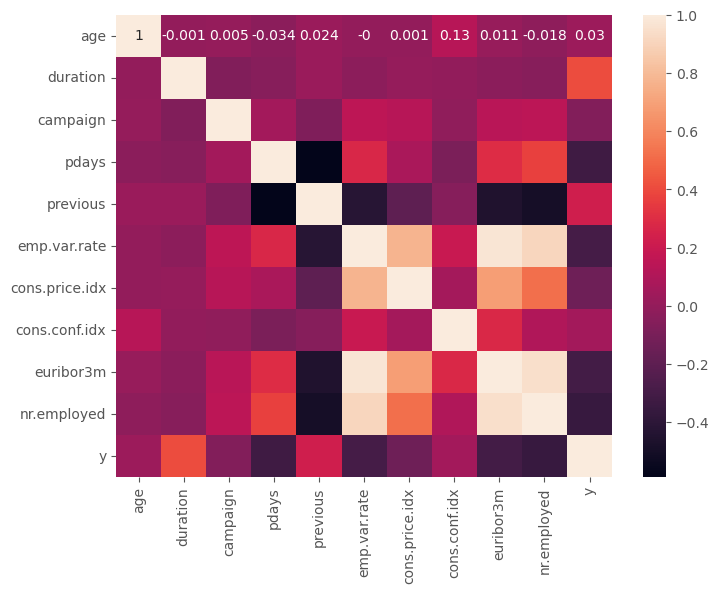

In [53]:
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot = True)


In [54]:
corr

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
age,1.000,-0.001,0.005,-0.034,0.024,-0.000,0.001,0.129,0.011,-0.018,0.030
duration,-0.001,1.000,-0.072,-0.048,0.021,-0.028,0.005,-0.008,-0.033,-0.045,0.405
campaign,0.005,-0.072,1.000,0.053,-0.079,0.151,0.128,-0.014,0.135,0.144,-0.066
pdays,-0.034,-0.048,0.053,1.000,-0.588,0.271,0.079,-0.091,0.297,0.373,-0.325
previous,0.024,0.021,-0.079,-0.588,1.000,-0.421,-0.203,-0.051,-0.455,-0.501,0.230
emp.var.rate,-0.000,-0.028,0.151,0.271,-0.421,1.000,0.775,0.196,0.972,0.907,-0.298
cons.price.idx,0.001,0.005,0.128,0.079,-0.203,0.775,1.000,0.059,0.688,0.522,-0.136
cons.conf.idx,0.129,-0.008,-0.014,-0.091,-0.051,0.196,0.059,1.000,0.278,0.101,0.055
euribor3m,0.011,-0.033,0.135,0.297,-0.455,0.972,0.688,0.278,1.000,0.945,-0.308
nr.employed,-0.018,-0.045,0.144,0.373,-0.501,0.907,0.522,0.101,0.945,1.000,-0.355


* *Seeing some strong correlation between these variables:*
  * 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'

In [55]:
corr2 = corr.loc[['emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'], 
                 ['emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y']]
corr2

,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
emp.var.rate,1.000,0.775,0.196,0.972,0.907,-0.298
cons.price.idx,0.775,1.000,0.059,0.688,0.522,-0.136
cons.conf.idx,0.196,0.059,1.000,0.278,0.101,0.055
euribor3m,0.972,0.688,0.278,1.000,0.945,-0.308
nr.employed,0.907,0.522,0.101,0.945,1.000,-0.355
y,-0.298,-0.136,0.055,-0.308,-0.355,1.000


* *'**emp.var.rate**' has strong positive correlation with 'cons.price.idx', 'euribor3m', 'nr.employed'*
  * *Consider **dropping** 'cons.price.idx', 'euribor3m', 'nr.employed' - to avoid **multicollinearity** issues in modeling*
  * *We could also consider dropping 'emp.var.rate' and keeping 'nr.employed' instead - based on correlation with target var 'y'*

### Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.

#### Business Objective ####
* *The data is from a Portuguese banking institution and is a collection of the results of multiple marketing campaigns. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required.*
* *The classification goal is to predict if the client subscribes (yes) for the product (bank term deposit) or not (no).*

### Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features, prepare the features and target column for modeling with appropriate encoding and transformations.

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41176 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41176 non-null  int64  
 1   job             41176 non-null  object 
 2   marital         41176 non-null  object 
 3   education       41176 non-null  object 
 4   default         41176 non-null  object 
 5   housing         41176 non-null  object 
 6   loan            41176 non-null  object 
 7   contact         41176 non-null  object 
 8   month           41176 non-null  object 
 9   day_of_week     41176 non-null  object 
 10  duration        41176 non-null  int64  
 11  campaign        41176 non-null  int64  
 12  pdays           41176 non-null  int64  
 13  previous        41176 non-null  int64  
 14  poutcome        41176 non-null  object 
 15  emp.var.rate    41176 non-null  float64
 16  cons.price.idx  41176 non-null  float64
 17  cons.conf.idx   41176 non-null  floa

**Cleanup and encode the data - prepare features and target column**
* *Drop columns: 'default', 'housing', 'loan', 'day_of_week', 'duration', 'pdays', 'previous', 'poutcome'
* *Drop rows with '**unknown**' value in '**job**' column* - small proportion of the data and best not to impute
* *Use Ordinal encoding for '**job**' column*
* *Drop rows with '**unknown**' value in '**marital**' column* -- very small proportion of the data
* *Use Label encoding for '**marital**' column*
* *Drop rows with '**unknown**' value in '**education**' column* -- small proportion of the data, best not to impute
* *Use Ordinal encoding for '**education**' column*
* *May be best to ignore 'default' column since only 3 of 41k have defaulted. Does not add value to the modeling*
* *Drop '**default**' column*
* *Consider dropping **housing** column since the subscribed proportion seems very similar - i.e., doesn't seem to have any relevant impact on subscription*
  * *Drop column '**housing**'*
* *Consider dropping **loan** column since the subscribed proportion seems very similar - i.e., doesn't seem to have any relevant impact on subscription*
  * *Drop column '**loan**'*
* *Use Ordinal encoding for '**month**' column*
* *Contact **day of week** does not seem to be making a relevant difference in subscription*
  * *Drop column '**day of week**'*
* *Contact **duration**, as outlined in the description, is only known after the call, hence it should not be used for predictive purposes*
  * *Drop column '**duration**'*
* *Over 96% of the times, client was not contacted before. **pdays** should be dropped for modeling purposes, not enough distribution to bring any relevant insights*
  * *Drop **pdays***
* *Over 86% of the times, no previous contact with client. **previous** should be dropped from modeling*
  * *Drop **previous***
* *Same as **previous**, not enough data to make a relevant impact on modeling.*
  * *Drop **poutcome**.*
* *Use Binary encoding for target column '**y**'*

* *Drop columns: 'default', 'housing', 'loan', 'day_of_week', 'duration', 'pdays', 'previous', 'poutcome'*



In [57]:
df.drop(['default', 'housing', 'loan', 'day_of_week', 'duration', 'pdays', 'previous', 'poutcome'], axis=1, inplace=True)
df.shape

(41176, 13)

* *Drop rows with '**unknown**' value in 'job', 'marital', 'education' columns*


In [58]:
df = df[df.job != 'unknown']
df.shape

(40846, 13)

In [59]:
df = df[df.marital != 'unknown']
df.shape

(40775, 13)

In [60]:
df = df[df.education != 'unknown']
df.shape

(39180, 13)

* *Drop columns **'cons.price.idx', 'euribor3m', 'nr.employed'*** - to avoid multicollinearity issues

In [61]:
df.drop(['cons.price.idx', 'euribor3m', 'nr.employed'], axis=1, inplace=True)
df.shape

(39180, 10)

### Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

In [62]:
X = df.drop(['y'], axis = 1)
y = df['y']
X.shape, y.shape

((39180, 9), (39180,))

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((29385, 9), (9795, 9), (29385,), (9795,))

### Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

***Prep for encoders for the categorical columns*** -- 'marital', 'month', 'job', 'education', 'contact'

In [64]:
cat_cols = X_train.select_dtypes(include=['object']).columns #categorical columns
cat_cols

Index(['job', 'marital', 'education', 'contact', 'month'], dtype='object')

In [65]:
numeric_cols = X_train.select_dtypes(exclude=['object']).columns #numeric columns
numeric_cols

Index(['age', 'campaign', 'emp.var.rate', 'cons.conf.idx'], dtype='object')

In [66]:
job_cats = df.job.unique()
job_cats

array(['housemaid', 'services', 'admin.', 'technician', 'blue-collar',
       'retired', 'management', 'unemployed', 'self-employed',
       'entrepreneur', 'student'], dtype=object)

In [67]:
marital_cats = df.marital.unique()
marital_cats

array(['married', 'single', 'divorced'], dtype=object)

In [68]:
education_cats = df.education.unique()
education_cats

array(['basic.4y', 'high.school', 'basic.6y', 'basic.9y',
       'professional.course', 'university.degree', 'illiterate'],
      dtype=object)

In [69]:
contact_cats = df.contact.unique()
contact_cats

array(['telephone', 'cellular'], dtype=object)

In [70]:
month_cats = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']
month_cats

['jan',
 'feb',
 'mar',
 'apr',
 'may',
 'jun',
 'jul',
 'aug',
 'sep',
 'oct',
 'nov',
 'dec']

In [71]:
from sklearn.dummy import DummyClassifier
from sklearn.compose import make_column_transformer, make_column_selector

transformer = make_column_transformer((OrdinalEncoder(categories = [job_cats]), ['job']),
                                      (OrdinalEncoder(categories = [marital_cats]), ['marital']),
                                      (OrdinalEncoder(categories = [education_cats]), ['education']),
                                      (OrdinalEncoder(categories = [contact_cats]), ['contact']),
                                      (OrdinalEncoder(categories = [month_cats]), ['month']),
                                      (StandardScaler(), numeric_cols))

dummy_pipe = Pipeline([
    ('transform', transformer),
    ('model', DummyClassifier())  # Dummy classifier model
])

dummy_pipe = dummy_pipe.fit(X_train, y_train)
baseline_score = dummy_pipe.score(X_test, y_test)

print(f' Baseline score: {baseline_score}')

 Baseline score: 0.890454313425217


In [72]:
from sklearn.metrics import recall_score, classification_report, confusion_matrix
baseline_recall = recall_score(y_test, dummy_pipe.predict(X_test))
print(f' Baseline recall: {baseline_recall}')

 Baseline recall: 0.0


### Problem 8: A Simple Model

Use Logistic Regression to build a basic model on your data.  

In [73]:
start_time = time.time()

lgr_pipe = Pipeline([
    ('transform', transformer),
    ('model', LogisticRegression())
]).fit(X_train, y_train)

lgr_time = time.time() - start_time

### Problem 9: Score the Model

What is the accuracy of your model?

* *For this use case, I think optimizing on the **Recall score** would be the best evaluation metric*
  * -- we want to maximise detection of potential subscribers

In [74]:
lgr_train_score = lgr_pipe.score(X_train, y_train)
lgr_test_score = lgr_pipe.score(X_test, y_test)

print(f'LGR Train score: {lgr_train_score}, Test score: {lgr_test_score}, Time: {lgr_time}')

LGR Train score: 0.8857920707844138, Test score: 0.8898417559979581, Time: 0.17389941215515137


In [75]:
def print_metrics(model, pipe):
    y_pred = pipe.predict(X_test)
    recall = recall_score(y_test, y_pred)
    print(f' {model} recall: {recall}')
    
    conf_mat = confusion_matrix(y_test, y_pred)
    print(f' {model} Confusion Matrix:')
    print(conf_mat)
    print(f'\n {model} Classification Report:')
    print(classification_report(y_test, y_pred))
    return recall

In [76]:
lgr_recall = print_metrics("LGR", lgr_pipe)

 LGR recall: 0.05405405405405406
 LGR Confusion Matrix:
[[8658   64]
 [1015   58]]

 LGR Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.99      0.94      8722
           1       0.48      0.05      0.10      1073

    accuracy                           0.89      9795
   macro avg       0.69      0.52      0.52      9795
weighted avg       0.85      0.89      0.85      9795



### Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

**KNN model**

In [77]:
start_time = time.time()

knn_pipe = Pipeline([
    ('transform', transformer),
    ('model', KNeighborsClassifier())
]).fit(X_train, y_train)

knn_time = time.time() - start_time

knn_train_score = knn_pipe.score(X_train, y_train)
knn_test_score = knn_pipe.score(X_test, y_test)

print(f'KNN Train score: {knn_train_score}, Test score: {knn_test_score}, Time: {knn_time}')

KNN Train score: 0.9113493278883784, Test score: 0.8877998979070955, Time: 0.19189143180847168


In [78]:
knn_recall = print_metrics("KNN", knn_pipe)

 KNN recall: 0.2581547064305685
 KNN Confusion Matrix:
[[8419  303]
 [ 796  277]]

 KNN Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.97      0.94      8722
           1       0.48      0.26      0.34      1073

    accuracy                           0.89      9795
   macro avg       0.70      0.61      0.64      9795
weighted avg       0.87      0.89      0.87      9795



**Decision Tree**

In [79]:
start_time = time.time()

dtree_pipe = Pipeline([
    ('transform', transformer),
    ('model', DecisionTreeClassifier())
]).fit(X_train, y_train)

dtree_time = time.time() - start_time

dtree_train_score = dtree_pipe.score(X_train, y_train)
dtree_test_score = dtree_pipe.score(X_test, y_test)

print(f'DT Train score: {dtree_train_score}, Test score: {dtree_test_score}, Time: {dtree_time}')

DT Train score: 0.9666836821507572, Test score: 0.8551301684532925, Time: 0.1529238224029541


In [80]:
dtree_recall = print_metrics("DT", dtree_pipe)

 DT recall: 0.25629077353215285
 DT Confusion Matrix:
[[8101  621]
 [ 798  275]]

 DT Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.93      0.92      8722
           1       0.31      0.26      0.28      1073

    accuracy                           0.86      9795
   macro avg       0.61      0.59      0.60      9795
weighted avg       0.84      0.86      0.85      9795



**SVM**

In [81]:
start_time = time.time()

svc_pipe = Pipeline([
    ('transform', transformer),
    ('model', SVC())
]).fit(X_train, y_train)

svc_time = time.time() - start_time

svc_train_score = svc_pipe.score(X_train, y_train)
svc_test_score = svc_pipe.score(X_test, y_test)

print(f'SVM Train score: {svc_train_score}, Test score: {svc_test_score}, Time: {svc_time}')

SVM Train score: 0.888174238557087, Test score: 0.890454313425217, Time: 37.292765855789185


In [82]:
svc_recall = print_metrics("SVC", svc_pipe)

 SVC recall: 0.0
 SVC Confusion Matrix:
[[8722    0]
 [1073    0]]

 SVC Classification Report:
              precision    recall  f1-score   support

           0       0.89      1.00      0.94      8722
           1       0.00      0.00      0.00      1073

    accuracy                           0.89      9795
   macro avg       0.45      0.50      0.47      9795
weighted avg       0.79      0.89      0.84      9795



In [83]:
dict = {'Model': ['LGR', 'KNN', 'DT', 'SVC'],
        'Train Time': [lgr_time, knn_time, dtree_time, svc_time],
        'Train Accuracy': [lgr_train_score, knn_train_score, dtree_train_score, svc_train_score],
        'Test Accuracy': [lgr_test_score, knn_test_score, dtree_test_score, svc_test_score],
        'Test Recall': [lgr_recall, knn_recall, dtree_recall, svc_recall]
        }
results_df = pd.DataFrame(dict).set_index('Model')

print(type(results_df))
print(results_df.shape)
results_df

<class 'pandas.core.frame.DataFrame'>
(4, 4)


,Train Time,Train Accuracy,Test Accuracy,Test Recall
Model,,,,
LGR,0.173899,0.885792,0.889842,0.054054
KNN,0.191891,0.911349,0.887800,0.258155
DT,0.152924,0.966684,0.855130,0.256291
SVC,37.292766,0.888174,0.890454,0.000000


### Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.

- More feature engineering and exploration.  For example, should we keep the gender feature?  Why or why not?
- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

**Finding best params for LogisticRegression**

In [84]:
param_grid = {
    'model__C': [0.1, 1, 10],
    'model__penalty': ['l1', 'l2'],
    'model__solver': ['newton-cg', 'lbfgs', 'liblinear']
}
pipe = Pipeline([
    ('transform', transformer),
    ('model', LogisticRegression())
])
grid = GridSearchCV(pipe, param_grid, cv=5, scoring='recall', verbose=1).fit(X_train, y_train)

print("LGR:")
print("Best parameters:", grid.best_params_)
print("Best score:", grid.best_score_)

#Get the fit time and scores for the best params
start_time = time.time()
pipe = Pipeline([
    ('transform', transformer),
    ('model', LogisticRegression(C=grid.best_params_['model__C'], penalty=grid.best_params_['model__penalty'], solver=grid.best_params_['model__solver']))
]).fit(X_train, y_train)
lgr_time = time.time() - start_time

lgr_train_score = pipe.score(X_train, y_train)
lgr_test_score = pipe.score(X_test, y_test)

print(f'LGR Train score: {lgr_train_score}, Test score: {lgr_test_score}, Time: {lgr_time}')

Fitting 5 folds for each of 18 candidates, totalling 90 fits
LGR:
Best parameters: {'model__C': 1, 'model__penalty': 'l1', 'model__solver': 'liblinear'}
Best score: 0.04808122024676965
LGR Train score: 0.885928194657138, Test score: 0.8899438489025012, Time: 0.2748420238494873


In [85]:
lgr_recall = print_metrics("LGR", pipe)

 LGR recall: 0.05405405405405406
 LGR Confusion Matrix:
[[8659   63]
 [1015   58]]

 LGR Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.99      0.94      8722
           1       0.48      0.05      0.10      1073

    accuracy                           0.89      9795
   macro avg       0.69      0.52      0.52      9795
weighted avg       0.85      0.89      0.85      9795



**KNN - find best params**

In [86]:
param_grid = {
    'model__n_neighbors': [1, 3, 5, 7, 9],
    'model__weights': ['uniform', 'distance'],
    'model__algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}
pipe = Pipeline([
    ('transform', transformer),
    ('model', KNeighborsClassifier())])

grid = GridSearchCV(pipe, param_grid, cv=5, scoring='recall', verbose=1).fit(X_train, y_train)

print("KNN:")
print("Best parameters:", grid.best_params_)
print("Best score:", grid.best_score_)

#Get the fit time and scores for the best params
start_time = time.time()
pipe = Pipeline([
    ('transform', transformer),
    ('model', KNeighborsClassifier(n_neighbors=grid.best_params_['model__n_neighbors'], weights=grid.best_params_['model__weights'], algorithm=grid.best_params_['model__algorithm']))
]).fit(X_train, y_train)
knn_time = time.time() - start_time

knn_train_score = pipe.score(X_train, y_train)
knn_test_score = pipe.score(X_test, y_test)

print(f'KNN Train score: {knn_train_score}, Test score: {knn_test_score}, Time: {knn_time}')

Fitting 5 folds for each of 40 candidates, totalling 200 fits
KNN:
Best parameters: {'model__algorithm': 'auto', 'model__n_neighbors': 1, 'model__weights': 'uniform'}
Best score: 0.31984057588837533
KNN Train score: 0.9587884975327549, Test score: 0.8492087799897907, Time: 0.27184438705444336


In [87]:
knn_recall = print_metrics("KNN", pipe)

 KNN recall: 0.30102516309412863
 KNN Confusion Matrix:
[[7995  727]
 [ 750  323]]

 KNN Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.92      0.92      8722
           1       0.31      0.30      0.30      1073

    accuracy                           0.85      9795
   macro avg       0.61      0.61      0.61      9795
weighted avg       0.85      0.85      0.85      9795



**DecisionTree - finding best params**

In [88]:
param_grid = {
    'model__criterion': ['gini', 'entropy'],
    'model__max_depth': [3, 5, 7, 10],
    'model__min_samples_leaf': [1, 5, 10, 20]
}

pipe = Pipeline([
    ('transform', transformer),
    ('model', DecisionTreeClassifier())])

grid = GridSearchCV(pipe, param_grid, cv=5, scoring='recall', verbose=1).fit(X_train, y_train)

print("DT:")
print("Best parameters:", grid.best_params_)
print("Best score:", grid.best_score_)

#Get the fit time and scores for the best params
start_time = time.time()
pipe = Pipeline([
    ('transform', transformer),
    ('model', DecisionTreeClassifier(criterion=grid.best_params_['model__criterion'], max_depth=grid.best_params_['model__max_depth'], min_samples_leaf=grid.best_params_['model__min_samples_leaf']))
]).fit(X_train, y_train)
dtree_time = time.time() - start_time

dtree_train_score = pipe.score(X_train, y_train)
dtree_test_score = pipe.score(X_test, y_test)

print(f'DT Train score: {dtree_train_score}, Test score: {dtree_test_score}, Time: {dtree_time}')

Fitting 5 folds for each of 32 candidates, totalling 160 fits
DT:
Best parameters: {'model__criterion': 'entropy', 'model__max_depth': 7, 'model__min_samples_leaf': 1}
Best score: 0.2537873635804268
DT Train score: 0.897328568997788, Test score: 0.8952526799387442, Time: 0.08792901039123535


In [89]:
dtree_recall = print_metrics("DT", pipe)

 DT recall: 0.2506989748369059
 DT Confusion Matrix:
[[8500  222]
 [ 804  269]]

 DT Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.97      0.94      8722
           1       0.55      0.25      0.34      1073

    accuracy                           0.90      9795
   macro avg       0.73      0.61      0.64      9795
weighted avg       0.87      0.90      0.88      9795



**SVM - finding best params**

In [ ]:
param_grid = {
    'model__C': [0.1, 1, 10],
    'model__kernel': ['linear', 'rbf', 'poly']
}

pipe = Pipeline([
    ('transform', transformer),
    ('model', SVC())])

grid = GridSearchCV(pipe, param_grid, cv=5, scoring='recall', verbose=1).fit(X_train, y_train)

print("SVC:")
print("Best parameters:", grid.best_params_)
print("Best score:", grid.best_score_)

#Get the fit time and scores for the best params
start_time = time.time()
pipe = Pipeline([
    ('transform', transformer),
    ('model', SVC(C=grid.best_params_['model__C'], kernel=grid.best_params_['model__kernel']))
]).fit(X_train, y_train)
svc_time = time.time() - start_time

svc_train_score = pipe.score(X_train, y_train)
svc_test_score = pipe.score(X_test, y_test)

print(f'SVC Train score: {svc_train_score}, Test score: {svc_test_score}, Time: {svc_time}')

Fitting 5 folds for each of 9 candidates, totalling 45 fits


In [90]:
svc_recall = print_metrics("SCV", svc_pipe)

 SCV recall: 0.0
 SCV Confusion Matrix:
[[8722    0]
 [1073    0]]

 SCV Classification Report:
              precision    recall  f1-score   support

           0       0.89      1.00      0.94      8722
           1       0.00      0.00      0.00      1073

    accuracy                           0.89      9795
   macro avg       0.45      0.50      0.47      9795
weighted avg       0.79      0.89      0.84      9795



In [91]:
dict = {'Model': ['LGR', 'KNN', 'DT', 'SVC'],
        'Train Time': [lgr_time, knn_time, dtree_time, svc_time],
        'Train Accuracy': [lgr_train_score, knn_train_score, dtree_train_score, svc_train_score],
        'Test Accuracy': [lgr_test_score, knn_test_score, dtree_test_score, svc_test_score],
        'Test Recall': [lgr_recall, knn_recall, dtree_recall, svc_recall]
        }
results2_df = pd.DataFrame(dict).set_index('Model')

print(type(results2_df))
print(results2_df.shape)
results2_df

<class 'pandas.core.frame.DataFrame'>
(4, 4)


,Train Time,Train Accuracy,Test Accuracy,Test Recall
Model,,,,
LGR,0.274842,0.885928,0.889944,0.054054
KNN,0.271844,0.958788,0.849209,0.301025
DT,0.087929,0.897329,0.895253,0.250699
SVC,37.292766,0.888174,0.890454,0.000000


In [92]:
results_df #simple model results, copied here for comparison

,Train Time,Train Accuracy,Test Accuracy,Test Recall
Model,,,,
LGR,0.173899,0.885792,0.889842,0.054054
KNN,0.191891,0.911349,0.887800,0.258155
DT,0.152924,0.966684,0.855130,0.256291
SVC,37.292766,0.888174,0.890454,0.000000


**Results**
* KNN model seems to have benefited the most with hyperparameter tuning, coming up with the best test recall score.
* DecisionTree came up very close to the best recall score. It also has the shortest fit time of all models.
* SVM comes up next best, but at a very high compute cost.

##### Questions

* *